# Step 1 — Prepare your Colab environment & load the dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/ML Portfolio/4 - Association Rule Learning/2 - Eclat/Online Retail.csv')

In [4]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.shape

(541909, 8)

In [6]:
# Convert InvoiceDate to datetime (common column name). If your column name differs, change it.
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# Show summary info and how many null dates (helps spot bad rows)
print("Rows, cols:", df.shape)
print("InvoiceDate nulls:", df['InvoiceDate'].isna().sum())
df.info()

Rows, cols: (541909, 8)
InvoiceDate nulls: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
# 4. Show available years and a small sample of InvoiceNo -> items grouping
print("Years present:", df['InvoiceDate'].dt.year.unique())

# Show a sample invoice (grouped)
sample_invoice = df[df['InvoiceNo'] == df['InvoiceNo'].iloc[0]][['InvoiceNo','StockCode','Description','Quantity']].head(10)
print(sample_invoice)

Years present: [2010 2011]
  InvoiceNo StockCode                          Description  Quantity
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6
1    536365     71053                  WHITE METAL LANTERN         6
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6


# Step 2 — Cleaning + Filtering the Dataset

In [8]:
# Remove cancelled invoices
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
print("After removing cancelled invoices:", df.shape)


After removing cancelled invoices: (532621, 8)


In [9]:
df = df[df['Quantity'] > 0]
print("After removing negative/zero quantity:", df.shape)

After removing negative/zero quantity: (531285, 8)


In [10]:
df = df.dropna(subset=['Description'])
print("After dropping missing descriptions:", df.shape)

After dropping missing descriptions: (530693, 8)


In [11]:
df_year = df[df['InvoiceDate'].dt.year == 2011]
df_year.shape

(489073, 8)

In [12]:
df_year = df_year.reset_index(drop=True)

# Step 3 — Convert Invoices → Transaction Lists

In [13]:
transactions = (
    df_year.groupby('InvoiceNo')['Description']
    .apply(list)
    .tolist()
)

len(transactions), transactions[:3]

(18570,
 [['JUMBO BAG PINK POLKADOT',
   'BLUE POLKADOT WRAP',
   'RED RETROSPOT WRAP ',
   'RECYCLING BAG RETROSPOT ',
   'RED RETROSPOT SHOPPER BAG',
   'JUMBO BAG RED RETROSPOT',
   'RED RETROSPOT CHILDRENS UMBRELLA',
   'JAM MAKING SET PRINTED',
   'RECIPE BOX RETROSPOT ',
   'CHILDRENS APRON APPLES DESIGN',
   'PEG BAG APPLES DESIGN',
   'COFFEE MUG APPLES DESIGN',
   'COFFEE MUG PEARS  DESIGN',
   'WHITE HANGING HEART T-LIGHT HOLDER',
   'SET OF 6 T-LIGHTS EASTER CHICKS',
   'CAST IRON HOOK GARDEN FORK',
   'LOVE HEART NAPKIN BOX '],
  ['RED HANGING HEART T-LIGHT HOLDER',
   'CERAMIC BOWL WITH LOVE HEART DESIGN',
   'LARGE CAKE STAND HANGING HEARTS',
   'PLACE SETTING WHITE HEART',
   'DOORSTOP RETROSPOT HEART',
   'GINGHAM HEART  DOORSTOP RED',
   'CERAMIC CHERRY CAKE MONEY BANK',
   'LOVE HEART POCKET WARMER',
   'SWEETHEART CERAMIC TRINKET BOX'],
  ['GARDEN METAL SIGN ',
   'RED KITCHEN SCALES',
   'VICTORIAN SEWING BOX SMALL ',
   'VINTAGE SNAP CARDS']])

In [14]:
transactions = [list(set(item_list)) for item_list in transactions]
transactions[:3]

[['CAST IRON HOOK GARDEN FORK',
  'COFFEE MUG APPLES DESIGN',
  'RED RETROSPOT SHOPPER BAG',
  'JAM MAKING SET PRINTED',
  'PEG BAG APPLES DESIGN',
  'BLUE POLKADOT WRAP',
  'RED RETROSPOT CHILDRENS UMBRELLA',
  'COFFEE MUG PEARS  DESIGN',
  'WHITE HANGING HEART T-LIGHT HOLDER',
  'RECIPE BOX RETROSPOT ',
  'CHILDRENS APRON APPLES DESIGN',
  'SET OF 6 T-LIGHTS EASTER CHICKS',
  'RECYCLING BAG RETROSPOT ',
  'RED RETROSPOT WRAP ',
  'JUMBO BAG RED RETROSPOT',
  'JUMBO BAG PINK POLKADOT',
  'LOVE HEART NAPKIN BOX '],
 ['LOVE HEART POCKET WARMER',
  'RED HANGING HEART T-LIGHT HOLDER',
  'DOORSTOP RETROSPOT HEART',
  'PLACE SETTING WHITE HEART',
  'GINGHAM HEART  DOORSTOP RED',
  'LARGE CAKE STAND HANGING HEARTS',
  'CERAMIC CHERRY CAKE MONEY BANK',
  'SWEETHEART CERAMIC TRINKET BOX',
  'CERAMIC BOWL WITH LOVE HEART DESIGN'],
 ['VICTORIAN SEWING BOX SMALL ',
  'VINTAGE SNAP CARDS',
  'GARDEN METAL SIGN ',
  'RED KITCHEN SCALES']]

In [15]:
lengths = [len(t) for t in transactions]
np.mean(lengths), np.median(lengths), max(lengths)

(np.float64(25.812924071082392), np.float64(15.0), 1108)

# Step 4 — Prepare Data for Eclat (mlxtend)

In [16]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


## Convert transactions → one-hot encoding


In [17]:
te = TransactionEncoder()

te_ary = te.fit(transactions).transform(transactions)

df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

df_encoded.head()

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,returned,taig adjust,test,to push order througha s stock was,website fixed,wrongly coded 20713,wrongly coded 23343,wrongly marked,wrongly marked 23343,wrongly sold (22719) barcode
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


## Generate frequent itemsets (Eclat-style)

In [18]:
frequent_itemsets = fpgrowth(df_encoded, min_support=0.01, use_colnames=True)
frequent_itemsets.sort_values("support", ascending=False).head(10)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replac

,support,itemsets
0,0.109370,(WHITE HANGING HEART T-LIGHT HOLDER)
1,0.106193,(JUMBO BAG RED RETROSPOT)
72,0.097792,(REGENCY CAKESTAND 3 TIER)
161,0.088207,(PARTY BUNTING)
94,0.079645,(LUNCH BAG RED RETROSPOT)
95,0.072913,(ASSORTED COLOUR BIRD ORNAMENT)
23,0.071298,(SET OF 3 CAKE TINS PANTRY DESIGN )
96,0.065751,(PACK OF 72 RETROSPOT CAKE CASES)
318,0.065159,(LUNCH BAG BLACK SKULL.)
2,0.062574,(JUMBO BAG PINK POLKADOT)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [19]:
frequent_pairs = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) >= 2)]
frequent_pairs.sort_values("support", ascending=False).head(10)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,support,itemsets
806,0.042272,"(JUMBO BAG RED RETROSPOT, JUMBO BAG PINK POLKA..."
1239,0.038772,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC..."
1406,0.037049,"(JUMBO BAG RED RETROSPOT, JUMBO STORAGE BAG SUKI)"
1020,0.035110,"(JUMBO BAG RED RETROSPOT, JUMBO SHOPPER VINTAG..."
1650,0.033926,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY..."
1432,0.032795,"(LUNCH BAG RED RETROSPOT, LUNCH BAG BLACK SKU..."
1651,0.032149,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY..."
1442,0.031341,"(LUNCH BAG PINK POLKADOT, LUNCH BAG RED RETROS..."
995,0.030856,"(ALARM CLOCK BAKELIKE RED , ALARM CLOCK BAKELI..."
1474,0.029995,"(JUMBO BAG RED RETROSPOT, JUMBO BAG BAROQUE B..."


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

# Step 5 — Visualization of Frequent Itemsets

## Plot Top 20 Most Frequent Single Items

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

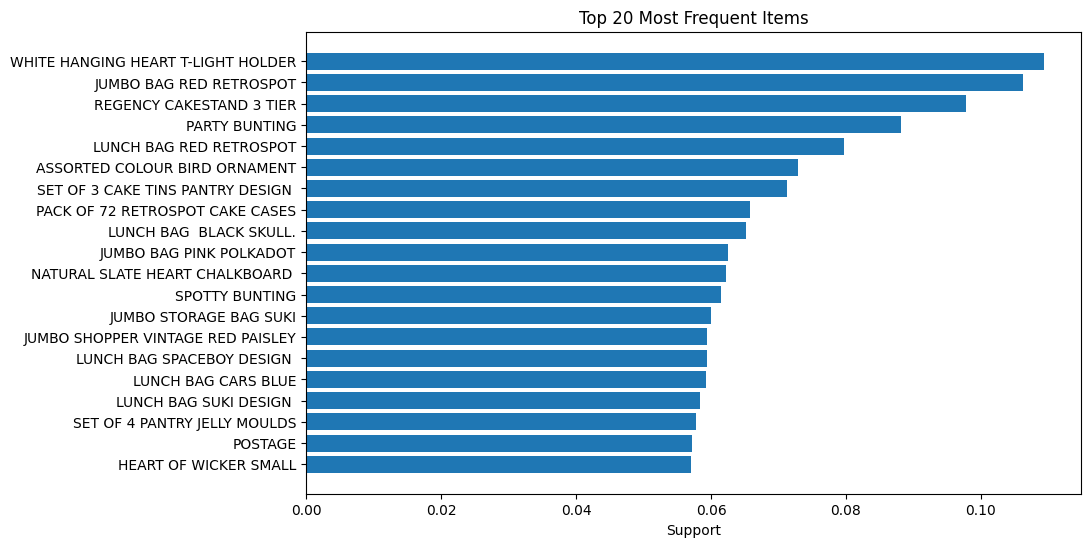

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [20]:
# Filter single-item itemsets only
single_items = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 1)]

# Extract item name from the frozenset
single_items['item'] = single_items['itemsets'].apply(lambda x: list(x)[0])

# Sort by support
top_20_items = single_items.sort_values('support', ascending=False).head(20)

plt.figure(figsize=(10,6))
plt.barh(top_20_items['item'], top_20_items['support'])
plt.gca().invert_yaxis()
plt.title("Top 20 Most Frequent Items")
plt.xlabel("Support")
plt.show()


## Plot Top 20 Most Frequent Item Pairs

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

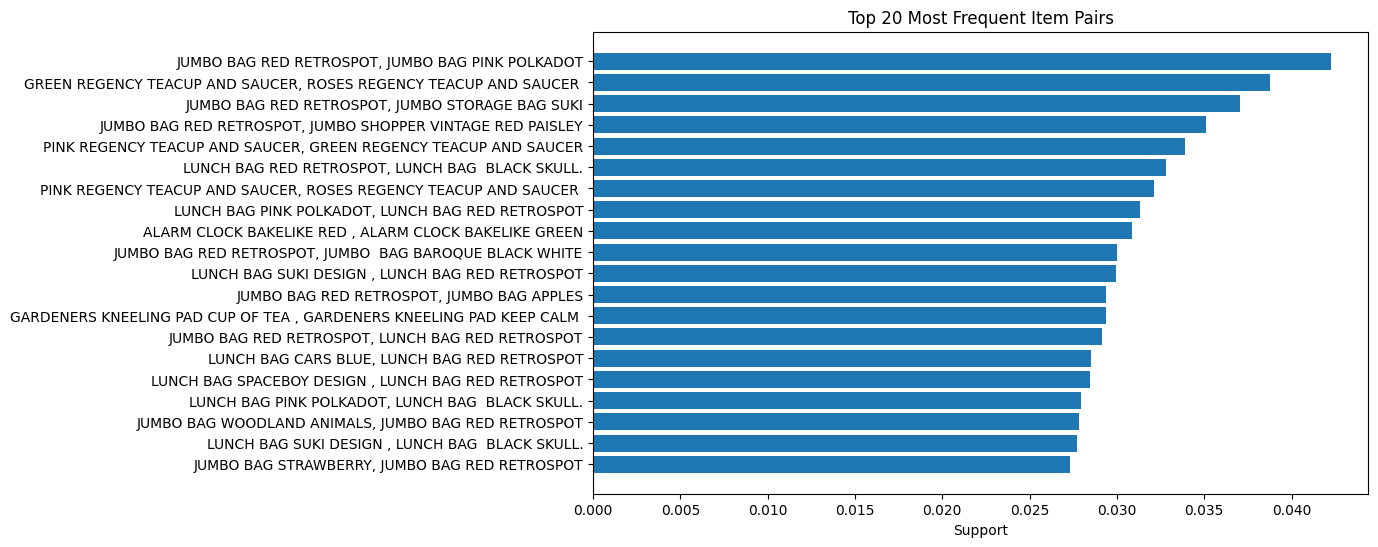

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [21]:
# Filter itemsets with 2 items
item_pairs = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 2)]

# Convert frozenset → string for plotting
item_pairs['pair'] = item_pairs['itemsets'].apply(lambda x: ', '.join(list(x)))

# Top pairs
top_20_pairs = item_pairs.sort_values('support', ascending=False).head(20)

plt.figure(figsize=(10,6))
plt.barh(top_20_pairs['pair'], top_20_pairs['support'])
plt.gca().invert_yaxis()
plt.title("Top 20 Most Frequent Item Pairs")
plt.xlabel("Support")
plt.show()
